In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
!pip install geopy


You should consider upgrading via the 'c:\python 3.9.2\python.exe -m pip install --upgrade pip' command.


In [3]:
data = pd.read_csv("Sample_Submission.csv")

In [4]:
data.head(5)

,ID,Time_taken (min)
0,0x2318,25.668333
1,0x3474,27.881667
2,0x9420,27.023333
3,0x72ee,28.153333
4,0xa759,21.018333


In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [7]:
df_train.shape

(45593, 20)

In [8]:
df_train.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [10]:
df_test = pd.read_csv('test.csv')

In [11]:
df_test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [12]:
df_test.shape

(11399, 19)

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          11399 non-null  object 
 3   Delivery_person_Ratings      11399 non-null  object 
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  11399 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weatherconditions            11399 non-null  object 
 12  Road_traffic_density         11399 non-null  object 
 13  Vehicle_conditio

we checked everything and we got well but there could be NAN values hide so let's find out

In [14]:
df_train=df_train.replace('NaN', float(np.nan), regex=True)
df_train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [15]:
df_test = df_test.replace('NaN', float(np.nan), regex=True)
df_test.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions              158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
dtype: int64

now we will join train and test data for cleaning

In [16]:
df = pd.concat([df_test.assign(indic = 'test'), df_train.assign(indic='train')])

In [17]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,indic,Time_taken(min)
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,test,NaN
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,test,NaN
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,test,NaN
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,test,NaN
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,test,NaN


In [18]:
df.shape

(56992, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56992 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          54647 non-null  object 
 3   Delivery_person_Ratings      54577 non-null  object 
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  54817 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weatherconditions            56218 non-null  object 
 12  Road_traffic_density         56237 non-null  object 
 13  Vehicle_conditio

removing string the part from weatherconditions and min

In [20]:
df['Weatherconditions'] = df['Weatherconditions'].str.split(" ", expand = True )[1]
df['Time_taken(min)'] = df['Time_taken(min)'].str.split(" ", expand = True)[1]

changing some columns datatypes into float

In [21]:
num_cols =['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'Time_taken(min)']

for col in num_cols:
    df[col] = df[col].astype('float64')

In [22]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56992 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           56992 non-null  object        
 1   Delivery_person_ID           56992 non-null  object        
 2   Delivery_person_Age          54647 non-null  float64       
 3   Delivery_person_Ratings      54577 non-null  float64       
 4   Restaurant_latitude          56992 non-null  float64       
 5   Restaurant_longitude         56992 non-null  float64       
 6   Delivery_location_latitude   56992 non-null  float64       
 7   Delivery_location_longitude  56992 non-null  float64       
 8   Order_Date                   56992 non-null  datetime64[ns]
 9   Time_Orderd                  54817 non-null  object        
 10  Time_Order_picked            56992 non-null  object        
 11  Weatherconditions            56218 non-nu

finding the distance in km using geodesic

In [23]:
cols = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
for col in cols:
    df[col] = abs(df[col])

this code of block can take time 

In [24]:
from geopy.distance import geodesic
import gc

df['distance'] = np.zeros(len(df))

restaurant_cordinates_df = df [['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
delivery_cordinates_df = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()

for i in range(len(df)):
    df['distance'].loc[i] = geodesic(restaurant_cordinates_df[i], delivery_cordinates_df[i])

C:\Users\VIKAS\AppData\Local\Temp\ipykernel_7928\2644955811.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'].loc[i] = geodesic(restaurant_cordinates_df[i], delivery_cordinates_df[i])


converting geodesic to float

In [25]:
df['distance'] = df['distance'].astype('str').str.extract('(\d+)')
df['distance']= df['distance'].astype('float64')

In [26]:
df['distance'].describe()

count    56992.000000
mean         9.244403
std          5.563173
min          1.000000
25%          4.000000
50%          9.000000
75%         13.000000
max         20.000000
Name: distance, dtype: float64

finding the order preparation time in minutes

In [27]:
df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

df['time_order_picked_formatted'] = np.where(df['Time_Order_picked'] < df['Time_Orderd'], df['Order_Date']+pd.DateOffset(1) +
                                           df['Time_Order_picked'], df['Order_Date']+df['Time_Order_picked'])
df['time_order_formatted'] = df['Order_Date'] + df['Time_Orderd']
df['order_time_preparation'] = ((df['time_order_picked_formatted'] - df['time_order_formatted']).dt.total_seconds())/60

In [28]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_vehicle,multiple_deliveries,Festival,City,indic,Time_taken(min),distance,time_order_picked_formatted,time_order_formatted,order_time_preparation
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,2022-03-30,NaT,...,electric_scooter,1,No,Metropolitian,test,NaN,6.0,2022-03-30 15:05:00,NaT,NaN
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,0 days 20:30:00,...,motorcycle,1,No,Metropolitian,test,NaN,17.0,2022-03-29 20:35:00,2022-03-29 20:30:00,5.0
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-10,0 days 19:35:00,...,motorcycle,1,No,Metropolitian,test,NaN,13.0,2022-03-10 19:45:00,2022-03-10 19:35:00,10.0
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-04-02,0 days 17:15:00,...,scooter,1,No,Metropolitian,test,NaN,13.0,2022-04-02 17:20:00,2022-04-02 17:15:00,5.0
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,0 days 18:25:00,...,scooter,1,No,Metropolitian,test,NaN,17.0,2022-03-27 18:40:00,2022-03-27 18:25:00,15.0


filling missing values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56992 entries, 0 to 45592
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   ID                           56992 non-null  object         
 1   Delivery_person_ID           56992 non-null  object         
 2   Delivery_person_Age          54647 non-null  float64        
 3   Delivery_person_Ratings      54577 non-null  float64        
 4   Restaurant_latitude          56992 non-null  float64        
 5   Restaurant_longitude         56992 non-null  float64        
 6   Delivery_location_latitude   56992 non-null  float64        
 7   Delivery_location_longitude  56992 non-null  float64        
 8   Order_Date                   56992 non-null  datetime64[ns] 
 9   Time_Orderd                  54817 non-null  timedelta64[ns]
 10  Time_Order_picked            56992 non-null  timedelta64[ns]
 11  Weatherconditions           

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [31]:
cat_attribs = ['Weatherconditions' ,'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City', 'indic']
num_attribs = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'distance', 'Time_taken(min)',
                'order_time_preparation', 'multiple_deliveries']

In [32]:
num_tranformer = SimpleImputer(strategy ='median')
cat_tranformer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(transformers = [
    ('num', num_tranformer, num_attribs) ,
    ('cat', cat_tranformer, cat_attribs)
])

df_cleant = pd.DataFrame(preprocessor.fit_transform(df), columns=['Delivery_person_Age', 'Delivery_person_Ratings',
                                                                  'Vehicle_condition','distance',
                                                                  'Time_taken(min)','order_time_preparation',
                                                                  'multiple_deliveries','Weatherconditions',
                                                                  'Road_traffic_density','Type_of_order',
                                                                  'Type_of_vehicle','Festival','City','indic'
                                                                 ])

In [33]:
df_cleant.isnull().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Vehicle_condition          0
distance                   0
Time_taken(min)            0
order_time_preparation     0
multiple_deliveries        0
Weatherconditions          0
Road_traffic_density       0
Type_of_order              0
Type_of_vehicle            0
Festival                   0
City                       0
indic                      0
dtype: int64

In [34]:
df_cleant['Weatherconditions'].value_counts()

Fog           10196
Stormy         9397
Cloudy         9397
Sandstorms     9373
Windy          9370
Sunny          9259
Name: Weatherconditions, dtype: int64

In [35]:
df_cleant['Type_of_vehicle'].value_counts()

motorcycle           33044
scooter              19093
electric_scooter      4764
bicycle                 91
Name: Type_of_vehicle, dtype: int64

In [36]:
df_cleant['Type_of_order'].value_counts()

Snack      14348
Meal       14252
Drinks     14242
Buffet     14150
Name: Type_of_order, dtype: int64

In [37]:
df_cleant['Road_traffic_density'].value_counts()

Low        20113
Jam        17646
Medium     13698
High        5535
Name: Road_traffic_density, dtype: int64

In [38]:
for col in num_attribs:
    df_cleant[col] = df_cleant[col].astype('float64')
df_cleant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      56992 non-null  float64
 1   Delivery_person_Ratings  56992 non-null  float64
 2   Vehicle_condition        56992 non-null  float64
 3   distance                 56992 non-null  float64
 4   Time_taken(min)          56992 non-null  float64
 5   order_time_preparation   56992 non-null  float64
 6   multiple_deliveries      56992 non-null  float64
 7   Weatherconditions        56992 non-null  object 
 8   Road_traffic_density     56992 non-null  object 
 9   Type_of_order            56992 non-null  object 
 10  Type_of_vehicle          56992 non-null  object 
 11  Festival                 56992 non-null  object 
 12  City                     56992 non-null  object 
 13  indic                    56992 non-null  object 
dtypes: float64(7), object(

In [39]:
df_cleant.loc[(df_cleant.indic == 'test'), 'Time_taken(min)'] = np.nan

In [40]:
df_cleant.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Vehicle_condition              0
distance                       0
Time_taken(min)            11399
order_time_preparation         0
multiple_deliveries            0
Weatherconditions              0
Road_traffic_density           0
Type_of_order                  0
Type_of_vehicle                0
Festival                       0
City                           0
indic                          0
dtype: int64

Data Exploration

In [41]:
df_cleant.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,distance,Time_taken(min),order_time_preparation,multiple_deliveries
count,56992.000000,56992.000000,56992.000000,56992.000000,45593.000000,56992.000000,56992.000000
mean,29.575397,4.636396,1.024968,9.244403,26.294607,-16.101821,0.751158
std,5.691393,0.329666,0.839171,5.563173,9.383806,191.910592,0.567695
min,15.000000,1.000000,0.000000,1.000000,10.000000,-1435.000000,0.000000
25%,25.000000,4.600000,0.000000,4.000000,19.000000,5.000000,0.000000
50%,30.000000,4.700000,1.000000,9.000000,26.000000,10.000000,1.000000
75%,34.000000,4.800000,2.000000,13.000000,32.000000,15.000000,1.000000
max,50.000000,6.000000,3.000000,20.000000,54.000000,15.000000,3.000000


In [42]:
%matplotlib inline

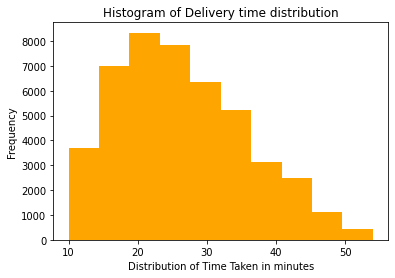

In [43]:
fig, ax= plt.subplots()

plt.hist(df_cleant['Time_taken(min)'],color = 'Orange')
plt.xlabel('Distribution of Time Taken in minutes')
plt.ylabel('Frequency')
plt.title("Histogram of Delivery time distribution")
plt.show()

In [44]:
!pip install plotly

You should consider upgrading via the 'c:\python 3.9.2\python.exe -m pip install --upgrade pip' command.


visualissing the numberical columns

C:\Users\VIKAS\AppData\Local\Temp\ipykernel_7928\540177538.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


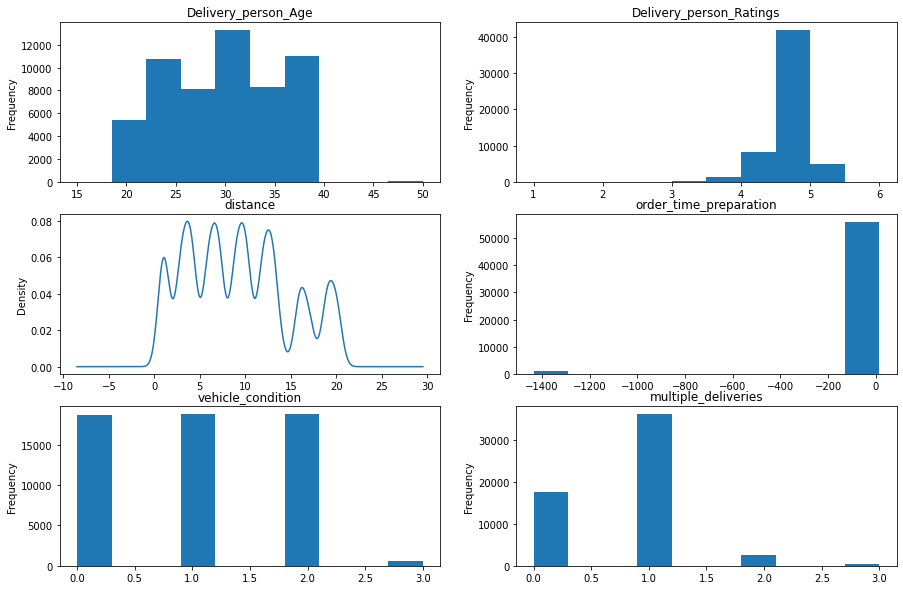

In [45]:
fig, axes = plt.subplots(3,2, figsize = (15,10))

df_cleant['Delivery_person_Age'].plot(kind = 'hist' , ax = axes [0,0], title = 'Delivery_person_Age')
df_cleant['Delivery_person_Ratings'].plot(kind = 'hist', ax = axes[0,1], title = 'Delivery_person_Ratings')
df_cleant['distance'].plot(kind = 'kde', ax = axes[1,0], title ='distance')
df_cleant['order_time_preparation'].plot(kind = 'hist', ax = axes[1,1], title = 'order_time_preparation')
df_cleant['Vehicle_condition'].plot(kind = 'hist', ax = axes[2,0], title ='vehicle_condition')
df_cleant['multiple_deliveries'].plot(kind = 'hist', ax = axes[2,1], title = 'multiple_deliveries')
fig.show()

In [46]:
df_cleant.describe(include='O').T

,count,unique,top,freq
Weatherconditions,56992,6,Fog,10196
Road_traffic_density,56992,4,Low,20113
Type_of_order,56992,4,Snack,14348
Type_of_vehicle,56992,4,motorcycle,33044
Festival,56992,2,No,55893
City,56992,3,Metropolitian,44114
indic,56992,2,train,45593


<AxesSubplot:title={'center':'City'}, ylabel='City'>

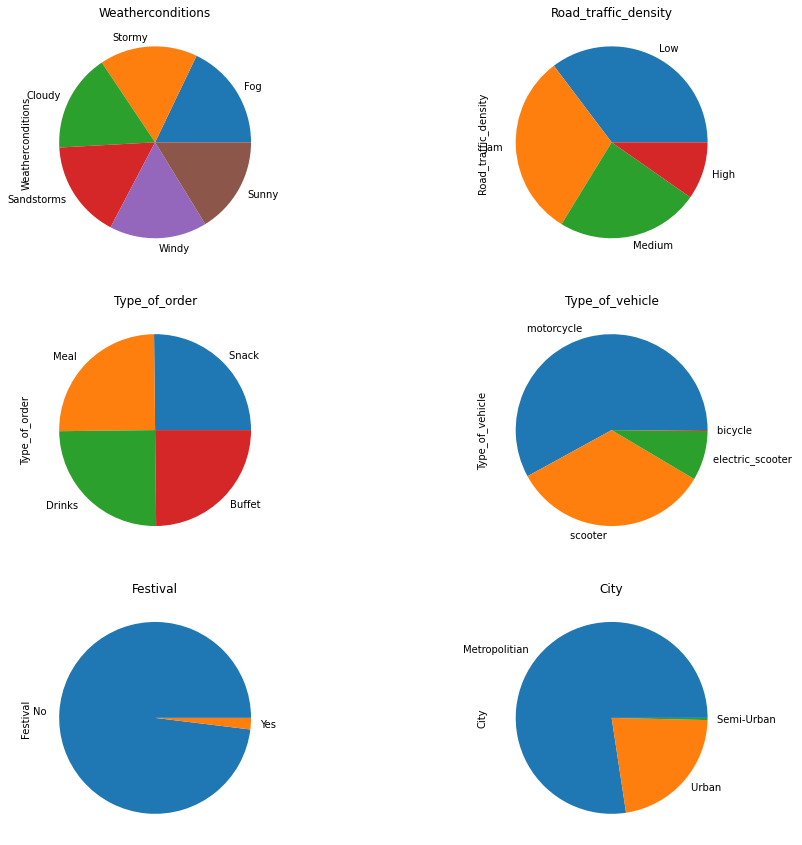

In [47]:
fig, axes = plt.subplots(3,2, figsize = (15,15))

df_cleant['Weatherconditions'].value_counts().plot(kind='pie', ax = axes  [0,0], title = 'Weatherconditions')
df_cleant['Road_traffic_density'].value_counts().plot(kind='pie', ax = axes [0,1], title = 'Road_traffic_density')
df_cleant['Type_of_order'].value_counts().plot(kind='pie', ax = axes [1,0], title = 'Type_of_order')
df_cleant['Type_of_vehicle'].value_counts().plot(kind='pie', ax = axes [1,1], title = 'Type_of_vehicle')
df_cleant['Festival'].value_counts().plot(kind='pie', ax = axes [2,0], title = 'Festival')
df_cleant['City'].value_counts().plot(kind='pie', ax = axes [2,1], title = 'City')

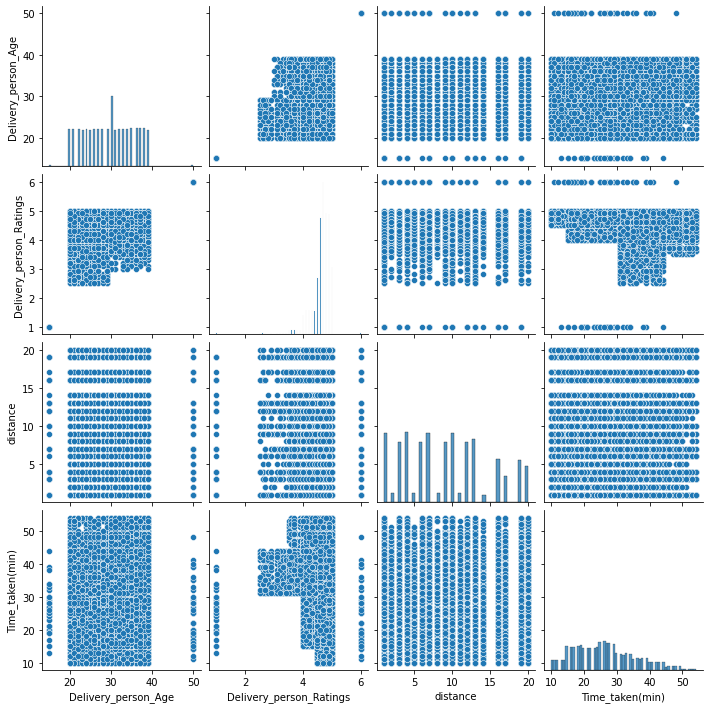

In [48]:
cols = ['Delivery_person_Age', 'Delivery_person_Ratings','distance','Time_taken(min)' ]
sns.pairplot(df_cleant[cols])

<AxesSubplot:xlabel='order_time_preparation', ylabel='Time_taken(min)'>

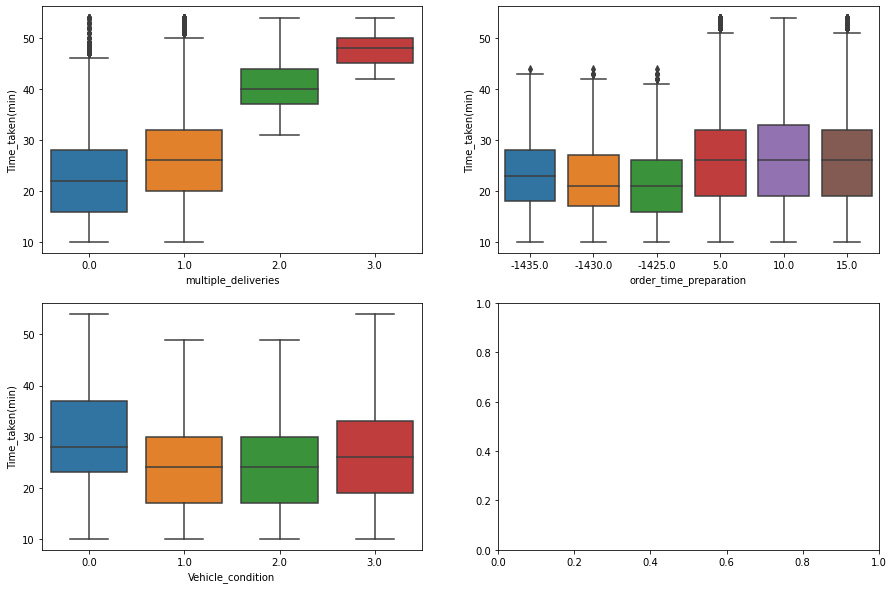

In [49]:
fig,axes = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(data = df_cleant, x ='multiple_deliveries', y = 'Time_taken(min)', ax = axes[0,0])
sns.boxplot(data = df_cleant, x ='Vehicle_condition', y = 'Time_taken(min)', ax = axes[1,0])
sns.boxplot(data = df_cleant, x ='order_time_preparation', y = 'Time_taken(min)', ax = axes[0,1])

relationship between categorical and time_taken

<AxesSubplot:xlabel='Time_taken(min)', ylabel='City'>

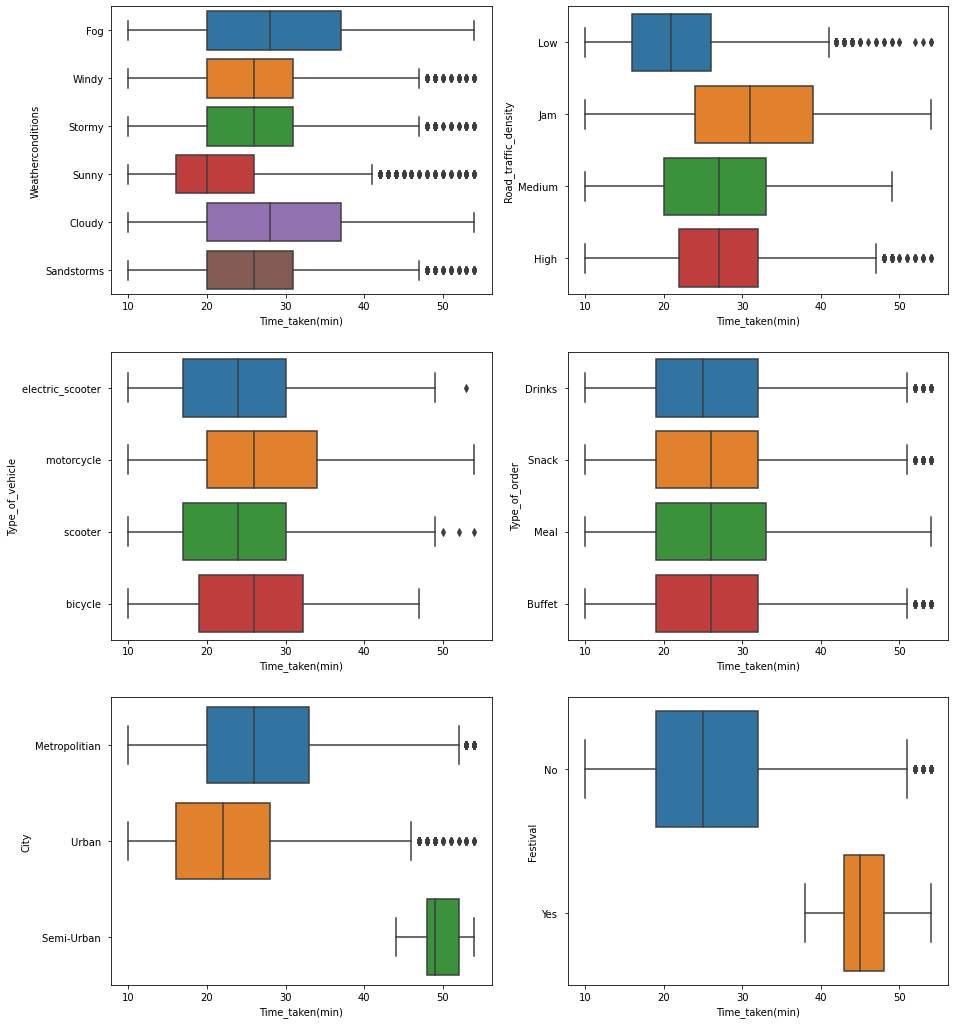

In [50]:
fig,axes = plt.subplots(3,2, figsize = (15,18))
sns.boxplot(data=df_cleant, y ='Weatherconditions', x ='Time_taken(min)', ax = axes[0,0])
sns.boxplot(data=df_cleant, y ='Road_traffic_density', x ='Time_taken(min)', ax = axes[0,1])
sns.boxplot(data=df_cleant, y ='Type_of_order', x ='Time_taken(min)', ax = axes[1,1])
sns.boxplot(data=df_cleant, y ='Type_of_vehicle', x ='Time_taken(min)', ax = axes[1,0])
sns.boxplot(data=df_cleant, y ='Festival', x ='Time_taken(min)', ax = axes[2,1])
sns.boxplot(data=df_cleant, y ='City', x ='Time_taken(min)', ax = axes[2,0])

correlation heatmap

<AxesSubplot:>

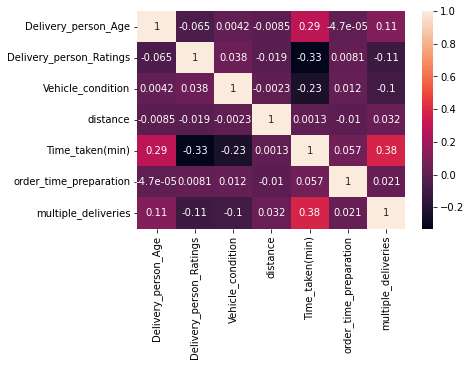

In [51]:
sns.heatmap(df_cleant.corr(), annot =True)

converting to binary

In [52]:
#converting to binary using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

Ohe_encoder = OneHotEncoder(handle_unknown='ignore', drop = 'first', sparse=False)
to_binary_cols = df_cleant[['Weatherconditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City']]

df_binary = pd.DataFrame(Ohe_encoder.fit_transform(to_binary_cols), 
                        columns=['Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy', 'Jam ',
                        'Low ', 'Medium ','Drinks ', 'Meal ', 'Snack ','electric_scooter ',
                        'motorcycle ', 'scooter ','festival','Semi-Urban ', 'Urban '])
Ohe_encoder.categories_

[array(['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy'],
       dtype=object),
 array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object),
 array(['Buffet ', 'Drinks ', 'Meal ', 'Snack '], dtype=object),
 array(['bicycle ', 'electric_scooter ', 'motorcycle ', 'scooter '],
       dtype=object),
 array(['No ', 'Yes '], dtype=object),
 array(['Metropolitian ', 'Semi-Urban ', 'Urban '], dtype=object)]

In [53]:
df_binary.head()

,Fog,Sandstorms,Stormy,Sunny,Windy,Jam,Low,Medium,Drinks,Meal,Snack,electric_scooter,motorcycle,scooter,festival,Semi-Urban,Urban
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


the numerical features

In [54]:
df_num = df_cleant[['Delivery_person_Age','Delivery_person_Ratings','Vehicle_condition','distance','Time_taken(min)'
                    ,'order_time_preparation','multiple_deliveries','indic']]

In [55]:
df_transformed = pd.concat([df_num, df_binary], axis = 1)
df_transformed.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,distance,Time_taken(min),order_time_preparation,multiple_deliveries,indic,Fog,Sandstorms,...,Medium,Drinks,Meal,Snack,electric_scooter,motorcycle,scooter,festival,Semi-Urban,Urban
0,30.0,4.7,3.0,6.0,NaN,10.0,1.0,test,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,28.0,4.6,0.0,17.0,NaN,5.0,1.0,test,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,23.0,4.5,0.0,13.0,NaN,10.0,1.0,test,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,21.0,4.8,1.0,13.0,NaN,5.0,1.0,test,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,31.0,4.6,2.0,17.0,NaN,15.0,1.0,test,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      56992 non-null  float64
 1   Delivery_person_Ratings  56992 non-null  float64
 2   Vehicle_condition        56992 non-null  float64
 3   distance                 56992 non-null  float64
 4   Time_taken(min)          45593 non-null  float64
 5   order_time_preparation   56992 non-null  float64
 6   multiple_deliveries      56992 non-null  float64
 7   indic                    56992 non-null  object 
 8   Fog                      56992 non-null  float64
 9   Sandstorms               56992 non-null  float64
 10  Stormy                   56992 non-null  float64
 11  Sunny                    56992 non-null  float64
 12  Windy                    56992 non-null  float64
 13  Jam                      56992 non-null  float64
 14  Low                   

In [57]:
test, train = df_transformed[df_transformed["indic"].eq("test")], df_transformed[df_transformed["indic"].eq("train")]

In [58]:
train = pd.DataFrame(df_transformed[df_transformed['indic'].eq('train')])
test = pd.DataFrame(df_transformed[df_transformed['indic'].eq('test')])

In [59]:
train.drop(['indic'], axis = 1, inplace = True)
test.drop(['indic','Time_taken(min)'], axis = 1, inplace = True)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45593 entries, 11399 to 56991
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  float64
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Vehicle_condition        45593 non-null  float64
 3   distance                 45593 non-null  float64
 4   Time_taken(min)          45593 non-null  float64
 5   order_time_preparation   45593 non-null  float64
 6   multiple_deliveries      45593 non-null  float64
 7   Fog                      45593 non-null  float64
 8   Sandstorms               45593 non-null  float64
 9   Stormy                   45593 non-null  float64
 10  Sunny                    45593 non-null  float64
 11  Windy                    45593 non-null  float64
 12  Jam                      45593 non-null  float64
 13  Low                      45593 non-null  float64
 14  Medium            

# Separating Train data into Features and Target Variable

Only the train data is important for building the models.

In [61]:
X = train.drop(['Time_taken(min)'], axis = 1)
y = train['Time_taken(min)']

In [62]:
X.shape, y.shape

((45593, 23), (45593,))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 16 )

Using all 25 features can lead to overfitting of the data and the predictions will be off. It can also be computationally very heavy. Hence, feature selection is an important task.I will use three methods for feature selection:

1- Random Forest Importance
2- Lasso Regression
3- Mutual Inforamtion

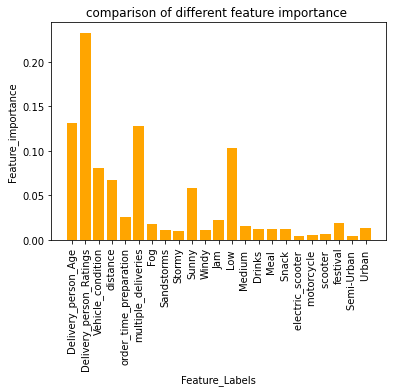

In [64]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor( criterion='squared_error', random_state = 7)
rf.fit(X_train,y_train)

feature_importance = rf.feature_importances_
plt.bar(X.columns, feature_importance, color = 'orange')
plt.xticks(rotation='vertical')
plt.xlabel('Feature_Labels')
plt.ylabel('Feature_importance')
plt.title('comparison of different feature importance ')
plt.show()

In [65]:
#using select from model
from sklearn.feature_selection import SelectFromModel

rf_selector = SelectFromModel(estimator=RandomForestRegressor())
rf_selector.fit(X_train,y_train)
X.columns[rf_selector.get_support()]

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'distance', 'multiple_deliveries', 'Sunny', 'Low '],
      dtype='object')

In [66]:
#using lassoCV to find the best alpha
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=10)
lassocv.fit(X_train,y_train)
alpha = lassocv.alpha_
print('Best alpha: ', alpha)

Best alpha:  0.10333252612159745


Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'distance', 'order_time_preparation', 'multiple_deliveries', 'Fog',
       'Sandstorms', 'Stormy', 'Sunny', 'Windy', 'Jam ', 'Low ', 'Medium ',
       'electric_scooter ', 'scooter ', 'festival', 'Semi-Urban ', 'Urban '],
      dtype='object')


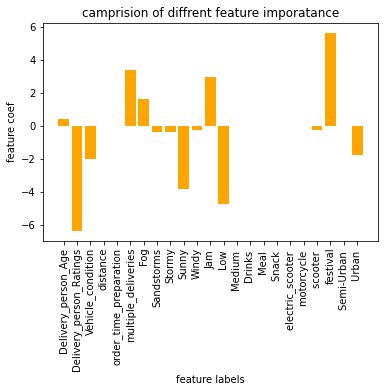

In [67]:
from sklearn.linear_model import Lasso

lasso_selector = SelectFromModel(Lasso(alpha=0.0155, random_state =34))
lasso_selector.fit(X_train,y_train)
print(X.columns[lasso_selector.get_support()])

coefs = lassocv.coef_
plt.bar(X.columns, coefs, color ='orange')
plt.xticks(rotation = 'vertical')
plt.xlabel('feature labels')
plt.ylabel('feature coef')
plt.title('camprision of diffrent feature imporatance')
plt.show()

In [68]:
#select 7 feature based on mutual info regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
selector = SelectKBest(mutual_info_regression, k=7)
selector.fit(X_train,y_train)
X.columns[selector.get_support()]

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Jam ', 'Low ', 'festival'],
      dtype='object')

based on above we can select 8 features
1.Delivery person ratings
2.multiple deliveries
3.Low
4.vehicle condition
5.Festival
6.Delivery person age
7.Sunny
8.Urban

In [69]:
X_train.drop(['Fog', 'Sandstorms', 'Stormy','Windy', 'Jam ', 
            'Medium ','Drinks ', 'Meal ', 'Snack ','electric_scooter ', 'motorcycle ', 
            'scooter ','Semi-Urban ','distance','order_time_preparation','Delivery_person_Age'], 
             axis = 1, inplace = True)
X_train.shape, y_train.shape

((27355, 7), (27355,))

In [70]:
X_test.drop([ 'Fog', 'Sandstorms', 'Stormy','Windy', 'Jam ', 
            'Medium ','Drinks ', 'Meal ', 'Snack ','electric_scooter ', 'motorcycle ', 
            'scooter ','Semi-Urban ','distance','order_time_preparation','Delivery_person_Age'], 
             axis = 1, inplace = True)
X_test.shape , y_test.shape

((18238, 7), (18238,))

# BUILDING MODELS

In [71]:
test_mse=[]
train_mse=[]

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
train_mse.append(mean_squared_error(y_train, reg.predict(X_train)))
test_mse.append(mean_squared_error(y_test, reg.predict(X_test)))

In [73]:
#regression coff
print("Intercept", reg.intercept_)

for i in zip(X_train.columns, reg.coef_):
    print(i)
print("R-squared", reg.score(X_train,y_train))

Intercept 64.01057072511568
('Delivery_person_Ratings', -7.645110706545642)
('Vehicle_condition', -1.9680684148343586)
('multiple_deliveries', 3.9919673103438402)
('Sunny', -4.488171638255002)
('Low ', -6.261285328489139)
('festival', 12.777088390711818)
('Urban ', -2.572024058448113)
R-squared 0.4545926917637515


In [74]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='squared_error', random_state=1)
dtree.fit(X_train,y_train)
print("Tree depth", dtree.get_depth())
print("terminal nodes", dtree.get_n_leaves())
train_mse.append(mean_squared_error(y_train,dtree.predict(X_train)))
test_mse.append(mean_squared_error(y_test,dtree.predict(X_test)))

Tree depth 17
terminal nodes 977


In [75]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[2,4,6,8,10,12,16,20],
    'max_leaf_nodes':[6,10,15,20,30,50,70]
}

dtree_grid_search= GridSearchCV(dtree, param_grid=param_grid,
                                cv=5,scoring='neg_mean_squared_error',
                                return_train_score=True
)
dtree_grid_search.fit(X_train,y_train)
dtree_grid_search.best_params_
print(dtree_grid_search.best_estimator_)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=70, random_state=1)


In [76]:
dtree_prund = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=70,
                                   criterion='squared_error', random_state=1)
dtree_prund.fit(X_train,y_train)

train_mse.append(mean_squared_error(y_train, dtree_prund.predict(X_train)))
test_mse.append(mean_squared_error(y_test, dtree_prund.predict(X_test)))

In [78]:
rf_reg = RandomForestRegressor(criterion='squared_error', random_state=1)
rf_reg.fit(X_train,y_train)
print(rf_reg.get_params(deep=True))
train_mse.append(mean_squared_error(y_train,rf_reg.predict(X_train)))
test_mse.append(mean_squared_error(y_test,rf_reg.predict(X_test)))


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [80]:
#Hypertunnig random forest , this will take time

param_grid = {
    'max_depth': [2,4,6,8,10,12],
    'max_features': ['sqrt', 'log2', None],
}

rf_grid_search = GridSearchCV(rf_reg, param_grid=param_grid,
                              cv = 5, scoring = 'neg_mean_squared_error',
                              return_train_score = True )
rf_grid_search.fit(X_train, y_train)
rf_grid_search.best_params_


{'max_depth': 8, 'max_features': None}

In [81]:
#Randomforest with hypertuned parameters

rf_cv = RandomForestRegressor(max_depth=8,max_features=None, random_state=5)
rf_cv.fit(X_train,y_train)
train_mse.append(mean_squared_error(y_train,rf_cv.predict(X_train)))
test_mse.append(mean_squared_error(y_test,rf_cv.predict(X_test)))

In [82]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=10)
ada.fit(X_train,y_train)
train_mse.append(mean_squared_error(y_train,ada.predict(X_train)))
test_mse.append(mean_squared_error(y_test,ada.predict(X_test)))

In [86]:
#tunning parameter for adaboost
param_grid={
    'n_estimators':[25,50,75,100],
    "learning_rate":[0.001, 0.01, 0.05, 0.1],
    'loss':['linear', 'exponential']
}
ada_grid_search = GridSearchCV(ada, param_grid=param_grid,
                              cv=5, scoring='neg_mean_squared_error',
                              return_train_score=True)
ada_grid_search.fit(X_train,y_train)
ada_grid_search.best_params_
print(ada_grid_search.best_estimator_)

AdaBoostRegressor(learning_rate=0.05, loss='exponential', n_estimators=75,
                  random_state=10)


In [87]:
#adaboost after cv
ada_reg = AdaBoostRegressor(learning_rate=0.05, loss='exponential', n_estimators=75,random_state=10)
ada_reg.fit(X_train,y_train)
train_mse.append(mean_squared_error(y_train,ada_reg.predict(X_train)))
test_mse.append(mean_squared_error(y_test,ada_reg.predict(X_test)))

In [89]:
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

param_grid={
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
}

knn_grid_search = GridSearchCV(knn,param_grid=param_grid,
                  cv=5,scoring='neg_mean_squared_error',
                  return_train_score=True)
knn_grid_search.fit(X_train,y_train)
knn_grid_search.best_params_
print(knn_grid_search.best_estimator_)

c:\python 3.9.2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\python 3.9.2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\python 3.9.2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\python 3.9.2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\python 3.9.2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\python 3.9.2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsR

KNeighborsRegressor(n_neighbors=10)


In [90]:
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train,y_train)
train_mse.append(mean_squared_error(y_train,knn_reg.predict(X_train)))
test_mse.append(mean_squared_error(y_test,knn_reg.predict(X_test)))

c:\python 3.9.2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\python 3.9.2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# Comparing model MSE

c:\python 3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python 3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean squared error by model')

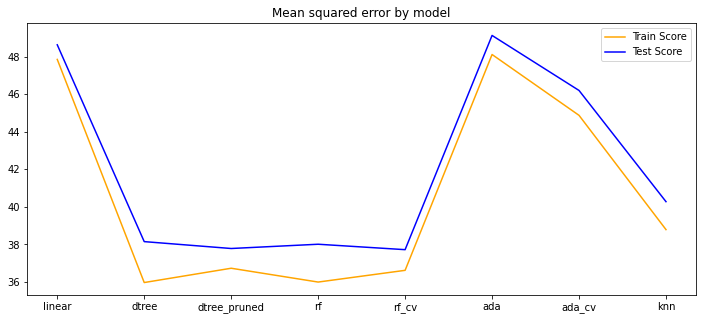

In [91]:
plt.figure(figsize=(12,5))
sns.lineplot(['linear','dtree','dtree_pruned','rf','rf_cv','ada','ada_cv','knn'],train_mse,label='Train Score', color = 'Orange')
sns.lineplot(['linear','dtree','dtree_pruned','rf','rf_cv','ada','ada_cv','knn'],test_mse,label='Test Score', color = 'Blue')
plt.title("Mean squared error by model")

In [92]:
list = ['linear','dtree','dtree_pruned','rf','rf_cv','ada','ada_cv','knn']
for i in zip(list, train_mse, test_mse):
    print(i)

('linear', 47.854940352301206, 48.63402502831464)
('dtree', 35.96973087885055, 38.14948767174179)
('dtree_pruned', 36.731328775753326, 37.78285185898964)
('rf', 35.99526294552403, 38.010070875969376)
('rf_cv', 36.619893633194785, 37.72093478053871)
('ada', 48.116353427400654, 49.13181188016171)
('ada_cv', 44.875875144266786, 46.20140732592675)
('knn', 38.7893375982453, 40.277680666739776)
